<a href="https://colab.research.google.com/github/CalebaR/MAT-421/blob/main/DAT402Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  
<h1><center>Predicting Normal and Abnormal Wafers</center></h1>
<h3><center></center></h3>
<h3><center>DAT 402</center></h3>
<h3><center>5-29-24</center></h3>

## Introduction to the Data
The data set is from semiconductor manufacturing. There are 7164 entries and 153 variables. Each entry is a processed wafer. The classifier variable is the first column and is binary having values of "1" and "-1". "1" means the wafer is normal and "-1" means the wafer is abnormal. The rest of the 152 variables are process control data from sensors. These are all numerical doubles. The goal of this project is to predict normal and abnormal wafers using the process control data.

Data source: https://www.timeseriesclassification.com/description.php?Dataset=Wafer
\
\
First, we can load all of the needed packages. The data is given in .txt files and is already split into train data and test data. The train data has 1000 entries and the test data has 6164 entries.

In [15]:
#install.packages("kknn")
#install.packages("caret")
#install.packages('naivebayes')
library(tidyverse);
library(kknn)
library(caret) #useful for confusionMatrix
library(naivebayes)

trainData = read.table("Wafer_TRAIN.txt", header = FALSE, sep = "", dec = ".")
testData = read.table("Wafer_TEST.txt", header = FALSE, sep = "", dec = ".") #reading txt files to data frame

dim(trainData)
dim(testData) #show dimension of data frames

[1] 1000  153

[1] 6164  153

Next, we can view some of the data. All of the variables are currently numerical doubles. This makes sense for variables V2 to V153. Since our dependent/response variable is binary (1 and -1), we need to convert it to be categorical. Remember, 1 is for wafers that were deemed normal and -1 for abnormal.

In [16]:
head(trainData)
head(testData)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-1.6022936,-1.6708228,-1.6936659,-1.6993767,-1.6993767,-1.7036597,-1.7036597,-1.7036597,-1.7036597,⋯,-1.1454320,-1.1454320,-1.1454320,-1.1454320,-1.1454320,-1.1454320,-1.1454320,-1.1454320,-1.1454320,-1.1454320
2,1,1.0845914,1.0845914,1.0845914,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076,⋯,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076
3,1,0.3626885,0.3626885,0.3626885,0.3933156,0.3626885,0.3626885,0.3626885,0.3626885,0.3626885,⋯,0.3933156,0.3933156,0.3933156,0.3626885,0.3933156,0.3933156,0.3933156,0.3933156,0.3933156,0.3933156
4,1,-1.0945235,-1.0945235,-1.0945235,-1.0967319,-1.0945235,-1.0967319,-1.0945235,-1.0945235,-1.0945235,⋯,-1.0967319,-1.0967319,-1.0967319,-1.0967319,-1.0967319,-1.0967319,-1.0967319,-1.0967319,-1.0967319,-1.0967319
5,1,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,⋯,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610
6,1,0.4250210,0.4250210,0.4562153,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210,⋯,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-1.079707,-1.083256,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,⋯,-1.0797068,-1.0797068,-1.0797068,-1.0797068,-1.0797068,-1.0797068,-1.0797068,-1.0797068,-1.0797068,-1.0797068
2,1,-1.080197,-1.078021,-1.078021,-1.078021,-1.078021,-1.078021,-1.080197,-1.078021,-1.078021,⋯,-1.1106696,-1.1128462,-1.1150228,-1.1171994,-1.1193760,-1.1215526,-1.1237292,-1.1259058,-1.1280824,-1.1302591
3,1,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,⋯,-1.1540601,-1.1540601,-1.1540601,-1.1540601,-1.1540601,-1.1540601,-1.1540601,-1.1540601,-1.1540601,-1.1540601
4,1,-1.658965,-1.696605,-1.705291,-1.711082,-1.711082,-1.715425,-1.715425,-1.715425,-1.715425,⋯,-1.1493818,-1.1493818,-1.1493818,-1.1493818,-1.1493818,-1.1493818,-1.1493818,-1.1493818,-1.1493818,-1.1493818
5,1,-1.201221,-1.199042,-1.199042,-1.201221,-1.199042,-1.199042,-1.199042,-1.199042,-1.199042,⋯,-1.1859678,-1.1837887,-1.1816096,-1.1794305,-1.1772515,-1.1750724,-1.1728933,-1.1707142,-1.1685351,-1.1663560
6,1,-1.488544,-1.519276,-1.527657,-1.533245,-1.537436,-1.537436,-1.537436,-1.533245,-1.537436,⋯,-0.9968258,-0.9968258,-0.9968258,-0.9968258,-0.9968258,-0.9968258,-0.9968258,-0.9968258,-0.9968258,-0.9968258


Here we convert the V1 response variable to a factor. Factors in R are a way to make data categorical. In the output we see that the "Levels" or categories are '-1' and '1'

In [17]:
trainData$V1 = as.factor(trainData$V1)
testData$V1 = as.factor(testData$V1) #convert response variable to be categorical nominal
trainData$V1

[1] 1  1  1  1  1  1  1  1  1  -1 1  1  1  1  -1 1  1  1  1  1  1  1  1  1 
  [25] 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  -1 1  1  1  1  1 
  [49] 1  1  1  1  1  1  1  -1 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
  [73] 1  1  1  1  1  1  1  1  1  -1 -1 -1 1  1  1  1  1  1  -1 1  1  -1 1  1 
  [97] 1  1  1  1  1  -1 -1 -1 -1 1  1  1  1  1  1  1  1  1  1  -1 1  1  1  1 
 [121] 1  1  -1 1  1  1  1  1  1  -1 1  -1 1  -1 1  -1 -1 1  -1 1  1  1  1  -1
 [145] -1 1  1  1  1  1  1  1  1  1  1  1  1  -1 1  1  1  1  1  1  1  1  -1 1 
 [169] 1  1  1  1  1  1  -1 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
 [193] 1  1  1  1  1  1  -1 1  1  1  1  1  1  1  1  -1 1  1  1  1  1  1  1  1 
 [217] 1  1  1  1  1  1  1  1  1  1  1  1  -1 1  1  -1 1  1  1  1  1  -1 1  1 
 [241] 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  -1 1 
 [265] 1  1  1  1  1  1  1  1  1  1  1  1  1  1  -1 1  1  1  -1 1  1  1  1  1 
 [289] 1  1  1  -1 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
 [313] 1  1  1  1  1  1  1  1  1  1  -1 1  1  1  1  1  1  1  1  1  1  1  1  1 
 [337] 1  1  1  1  1  1  1  1  1  1  1  1  -1 1  1  1  1  1  1  1  1  1  1  1 
 [361] 1  1  1  1  1  1  1  -1 1  -1 1  -1 -1 1  -1 1  1  -1 1  1  1  1  1  1 
 [385] 1  1  1  1  1  1  1  1  1  1  1  -1 1  1  1  1  1  1  -1 1  1  1  1  1 
 [409] 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  -1 1  1 
 [433] -1 1  1  1  1  1  -1 1  1  1  1  -1 1  1  1  1  -1 1  1  1  1  1  1  1 
 [457] 1  1  1  1  1  1  1  1  -1 1  1  1  1  1  1  1  1  1  1  -1 1  1  -1 1 
 [481] 1  -1 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
 [505] 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  -1 1  1  1  1  1 
 [529] 1  1  1  1  1  1  1  1  1  -1 1  -1 1  1  1  1  1  1  1  1  -1 -1 1  1 
 [553] 1  -1 -1 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  -1 1  1  1  1  1 
 [577] 1  1  1  1  1  1  1  1  1  1  1  1  -1 -1 1  1  1  1  1  1  1  1  -1 1 
 [601] 1  1  1  1  1  -1 -1 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
 [625] 1  1  1  1  1  1  1  -1 1  1  1  1  1  1  1  1  1  1  1  -1 1  1  1  1 
 [649] 1  1  1  1  1  1  1  1  1  1  1  1  -1 1  1  1  1  1  1  -1 1  1  1  1 
 [673] 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
 [697] -1 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
 [721] 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  -1 1 
 [745] 1  1  1  1  1  1  1  1  1  1  1  -1 1  1  1  1  1  1  1  1  1  1  1  1 
 [769] 1  1  -1 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
 [793] 1  1  1  -1 1  1  1  1  1  1  1  1  1  1  1  -1 1  1  1  1  1  1  1  -1
 [817] 1  -1 1  1  1  1  1  1  -1 1  1  1  1  1  1  1  1  1  1  -1 1  -1 1  1 
 [841] 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  -1 1  1  1  1  1  -1 1  -1
 [865] 1  1  -1 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
 [889] 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
 [913] 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  -1 1  1  1  -1 -1 1 
 [937] -1 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  -1 1  1 
 [961] 1  1  1  1  1  1  -1 1  1  1  1  1  1  1  1  1  1  1  1  -1 1  1  1  1 
 [985] 1  -1 1  1  -1 -1 1  1  1  1  1  1  1  -1 1  1 
Levels: -1 1

Above, we can notice that there are many 1's in the V1 variable and not many -1's. Here we can show the proportion of -1's in each dataset. Only about 10% of the data results in -1 or abnormal wafers.

In [18]:
sum(trainData$V1=='-1')/nrow(trainData)
sum(testData$V1=='-1')/nrow(testData)

[1] 0.097

[1] 0.1078845

## Data Manipulation and Analysis Using kknn()

Next, we can rescale the data for more consistent results. We will use this formula: $x_i\rightarrow\frac{x_i-\min(x)}{\max(x)-\min(x)}$. Looking at the data we can see that the predictors are now all between 0 and 1.

In [19]:
for(i in 2:ncol(trainData)){
  trainData[,i] = (trainData[,i] - min(trainData[,i]))/(max(trainData[,i])-min(trainData[,i]))
}
for(i in 2:ncol(testData)){
  testData[,i] = (testData[,i] - min(testData[,i]))/(max(testData[,i])-min(testData[,i]))
}
head(trainData,3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.1653769,0.2346507,0.2093497,0.2147464,0.2218085,0.2013754,0.2248545,0.1176004,0.05470156,⋯,0.08117956,0.08654791,0.1068764,0.1281702,0.1443307,0.1653768,0.1765412,0.1996616,0.2028182,0.2353417
2,1,0.9295249,0.9363859,0.9352538,0.9303544,0.9314444,0.9346653,0.8735742,0.7895420,0.76127811,⋯,0.84843695,0.84133762,0.8381368,0.8335048,0.8319988,0.8261506,0.8273928,0.8183575,0.8255695,0.8066515
3,1,0.7242163,0.7525353,0.7466348,0.7564167,0.7510969,0.7485947,0.7089631,0.6190384,0.58198595,⋯,0.61521598,0.61190641,0.6158577,0.6093348,0.6229704,0.6252972,0.6295554,0.6302943,0.6362736,0.6329922


Now, we can perform kNN similarly to how we did in HW2. I am limiting kvec to 1:50 to decrease computation time. A change made is we are now using misclassification rate instead of RMSE. Misclassification rate is (false negatives + false positives)/(total cases). The goal is to minimize misclassification rate the same way we want to minimize RSME. We need to use misclassification rate because we are predicting a categorical output.

In [20]:
kvec = 1:50
nk=length(kvec)

inMISS = rep(0,nk) #pre-allocating misclassification for in-sample data
outMISS = rep(0,nk) #pre-allocating misclassification for out-of-sample data

for(i in 1:nk){
    kmodtr = kknn(V1 ~., train=trainData, test=trainData, k=i, kernel="rectangular")
    kmod = kknn(V1 ~., train=trainData, test=testData, k=i, kernel="rectangular")

     #Instead of RSME, we can use the misclassification rate
     inMISS[i] = (table(trainData$V1,kmodtr$fitted.values)[2]+table(trainData$V1,kmodtr$fitted.values)[1,2])/sum(table(trainData$V1,kmodtr$fitted.values))
     outMISS[i] = (table(testData$V1,kmod$fitted.values)[2]+table(testData$V1,kmod$fitted.values)[1,2])/sum(table(testData$V1,kmod$fitted.values))
    }

We will plot misclassification rate similarly to how we printed RSME in HW2. These plots compare how misclassification rate compares for predicting in-sample train data and out-sample test data. Note how the misclassification rate for the in-sample data is able to be 0.

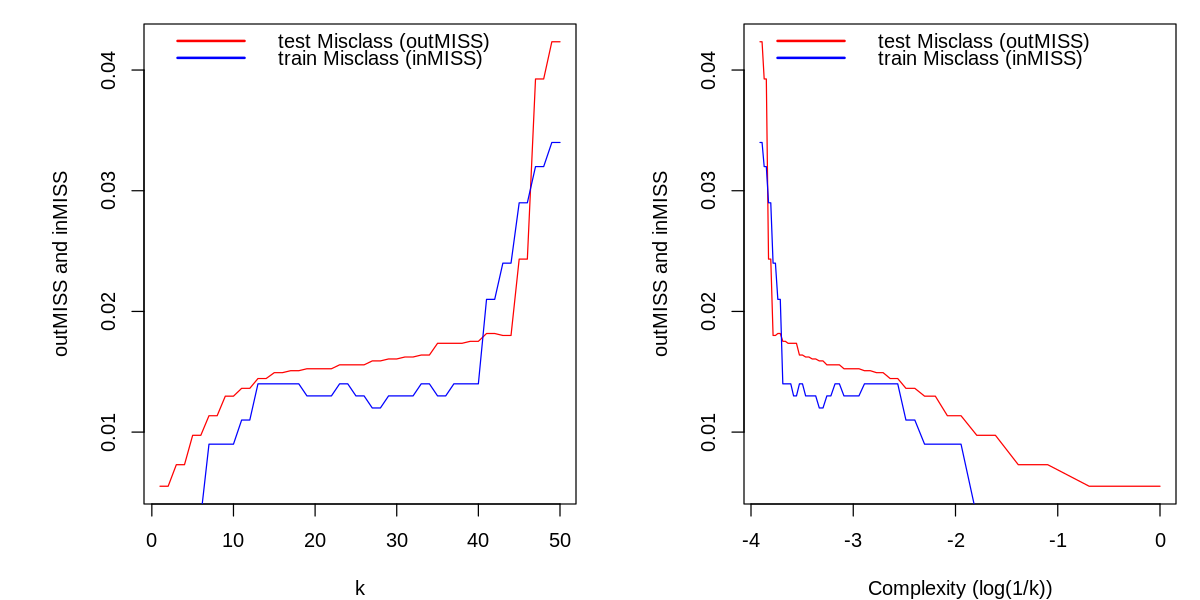

In [21]:
# Change plot size
options(repr.plot.width=10, repr.plot.height=5)

#make plot consist of two subplots in a row
par(mfrow=c(1,2),mar=c(4,6,1,1))

plot(kvec,outMISS,type="l",
     xlab="k",ylab="outMISS and inMISS",
     col="red",ylim=range(outMISS))
lines(kvec,inMISS,col="blue")
legend(x = "topleft",          # Position
       legend = c("test Misclass (outMISS)", "train Misclass (inMISS)"),  # Legend texts
       lty = c(1, 1),           # Line types
       col = c("red", "blue"),           # Line colors
       lwd = 2,                 # Line width
       bty = "n")   # boundary type

plot(log(1/kvec),outMISS,type="l",
     xlab="Complexity (log(1/k))",ylab="outMISS and inMISS",
     col="red",ylim=range(outMISS))
lines(log(1/kvec),inMISS,col="blue")
legend(x = "topleft",          # Position
       legend = c("test Misclass (outMISS)", "train Misclass (inMISS)"),  # Legend texts
       lty = c(1, 1),           # Line types
       col = c("red", "blue"),           # Line colors
       lwd = 2,                 # Line width
       bty = "n")   # boundary type

With the information created above, we can find the optimal k for our data. Minimizing the outMISS vector and finding that index gives us the optimal k. We find this optimal k is 1. Then, we can make a new kNN model with this optimal k. With this new model, we can make a confusion matrix. We see that our overall accuracy is 99.45% which seems to be very good.

In [22]:
kbest = which.min(outMISS) #find k with lowest misclassification
kbest

#create kNN model with the best k
kmodbest = kknn(V1 ~., train=trainData, test=testData, k=kbest, kernel="rectangular")

confusionMatrix(kmodbest$fitted.values, testData$V1, positive='1') #display results

[1] 1

Confusion Matrix and Statistics

          Reference
Prediction   -1    1
        -1  653   22
        1    12 5477
                                          
               Accuracy : 0.9945          
                 95% CI : (0.9923, 0.9962)
    No Information Rate : 0.8921          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9715          
                                          
 Mcnemar's Test P-Value : 0.1227          
                                          
            Sensitivity : 0.9960          
            Specificity : 0.9820          
         Pos Pred Value : 0.9978          
         Neg Pred Value : 0.9674          
             Prevalence : 0.8921          
         Detection Rate : 0.8885          
   Detection Prevalence : 0.8905          
      Balanced Accuracy : 0.9890          
                                          
       'Positive' Class : 1               
                        

## Data Manipulation and Analysis Using train.kknn()
There is another function within the kknn library. The function is train.kknn(). train.kknn() will create a kNN model and at the same time automatically determine the best k. It does this by performing Leave-One-Out cross validation. It performs Leave-One-Out CV up to the desired k and then chooses the best k which in this case is the one with the lowest misclassification rate. I chose k to go up to 300. train.kknn() appears to be extremely efficient. It only took 13 seconds to compute at kmax = 300. To compare, our above kknn() and loop took over 1 minute.

In [23]:
#using train.kknn() to do it all!
kmodtr2 = train.kknn(V1 ~., data=trainData, kmax=300, kernel="rectangular")

Below we can see the output of the train.kknn() model. To predict the output we need to use the predict() function with the train.kknn() model and test data. We can use the MISCLASS component of the model to plot the misclassification rate at each k similar to the above plots.


Call:
train.kknn(formula = V1 ~ ., data = trainData, kmax = 300, kernel = "rectangular")

Type of response variable: nominal
Minimal misclassification: 0.005
Best kernel: rectangular
Best k: 1

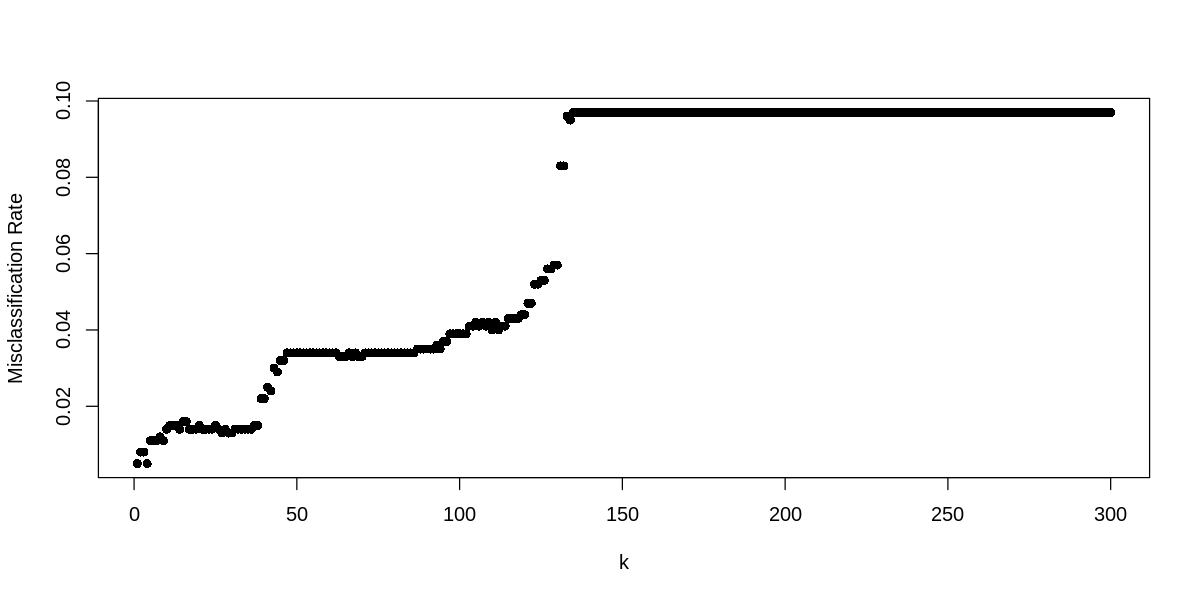

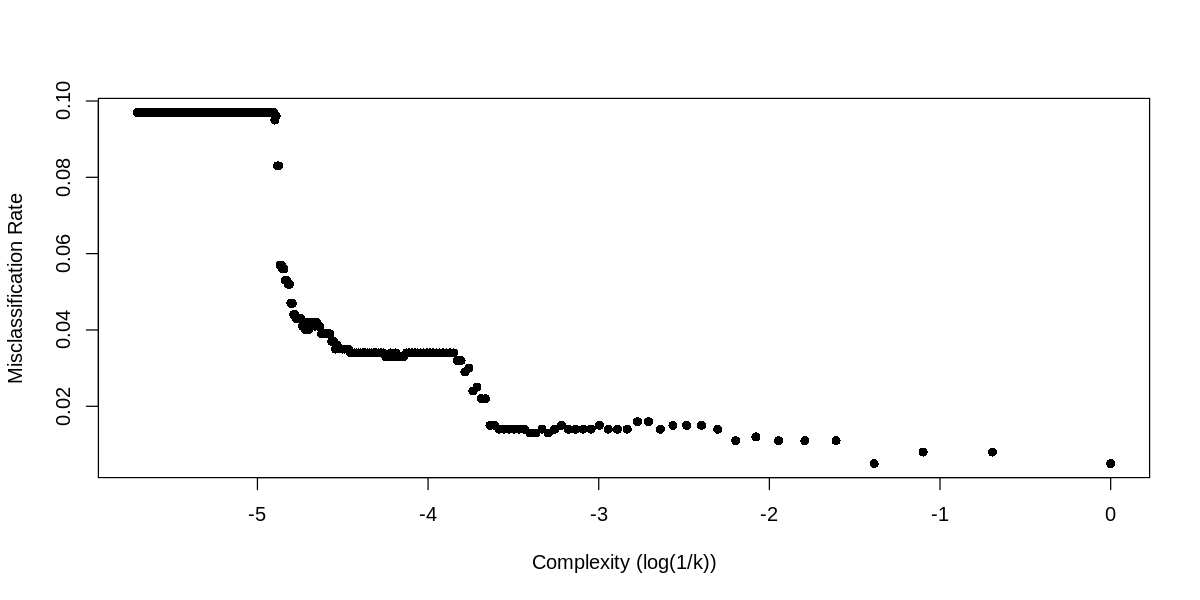

In [24]:
kmodtr2
prediction = predict(kmodtr2, testData) #predict testData using train.kknn() model

#plot misclassification rate
plot(1:300,kmodtr2$MISCLASS,pch=16,xlab='k',ylab='Misclassification Rate')
plot(log(1/1:300),kmodtr2$MISCLASS,pch=16,xlab='Complexity (log(1/k))',ylab='Misclassification Rate')

Again, we can use a confusion matrix to display the results of the model on the test data. We get the same results as the kknn() loop model with and accuracy of 99.45%.

In [25]:
confusionMatrix(prediction,testData$V1,positive='1') #display results from train.kknn()

Confusion Matrix and Statistics

          Reference
Prediction   -1    1
        -1  653   22
        1    12 5477
                                          
               Accuracy : 0.9945          
                 95% CI : (0.9923, 0.9962)
    No Information Rate : 0.8921          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9715          
                                          
 Mcnemar's Test P-Value : 0.1227          
                                          
            Sensitivity : 0.9960          
            Specificity : 0.9820          
         Pos Pred Value : 0.9978          
         Neg Pred Value : 0.9674          
             Prevalence : 0.8921          
         Detection Rate : 0.8885          
   Detection Prevalence : 0.8905          
      Balanced Accuracy : 0.9890          
                                          
       'Positive' Class : 1               
                        

Our accuracy is skewed because of the proportion of 1's in the data being about 90%. Let's look at the accuracy of the -1 (abnormal wafer) predictions. We see this accuracy is 98.2%. This is calculated by ((# of -1's in test data) - (false positive))/(# of -1's in test data) This is a bit lower than the overall accuracy, but is still very good.

In [26]:
#show accuracy of prediction for -1 (abnormal wafers)
(sum(testData$V1=='-1')-table(prediction,testData$V1)[2])/sum(testData$V1=='-1')

[1] 0.9819549

## Data Manipulation and Analysis Using naive_bayes()

Lastly, we can do a quick Naive Bayes classifier for fun. We can do this by using the naive_bayes() function from the naivebayes library. The first four lines of code are just resetting the data back to its original state. Then, the naive bayes model is created and predicted on the test data. The results are displayed in a confusion matrix. The overall accuracy is 87.2% which is decent for this application.

In [27]:
trainData = read.table("Wafer_TRAIN.txt", header = FALSE, sep = "", dec = ".")
testData = read.table("Wafer_TEST.txt", header = FALSE, sep = "", dec = ".") #reading txt files to data frame

trainData$V1 = as.factor(trainData$V1)
testData$V1 = as.factor(testData$V1) #convert response variable to be categorical nominal

nb = naive_bayes(V1~., trainData, usekernel = TRUE)
prediction = predict(nb,testData[-1])

confusionMatrix(prediction,testData$V1,positive='1')

Confusion Matrix and Statistics

          Reference
Prediction   -1    1
        -1  462  586
        1   203 4913
                                          
               Accuracy : 0.872           
                 95% CI : (0.8634, 0.8802)
    No Information Rate : 0.8921          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4694          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8934          
            Specificity : 0.6947          
         Pos Pred Value : 0.9603          
         Neg Pred Value : 0.4408          
             Prevalence : 0.8921          
         Detection Rate : 0.7970          
   Detection Prevalence : 0.8300          
      Balanced Accuracy : 0.7941          
                                          
       'Positive' Class : 1               
                        

Again, our accuracy is skewed because of the proportion of 1's in the data being about 90%. Let's look at the accuracy of the -1 (abnormal wafer) predictions. We see this accuracy is 69.47%. This is substantially lower than the overall accuracy. The accuracy of 1 (normal wafer) predictions is 89.35%.

In [28]:
(sum(testData$V1=='-1')-table(prediction,testData$V1)[2])/sum(testData$V1=='-1')
(sum(testData$V1=='1')-table(prediction,testData$V1)[1,2])/sum(testData$V1=='1')

[1] 0.6947368

[1] 0.8934352

## Conclusion
In this project we used K-nearest neighbors as a classifier and Naive Bayes classifier to predict a binary categorical output. When predicting on test data, K-nearest neighbors achieved a balanced accuracy of 98.9% and Naive Bayes achieved a balanced accuracy of 79.41%. The accuracy of the kNN model is quite amazing!

In the future, there may be a few ways to improve the models. First, since there are 153 variables, we may be able to reduce the number of variables while maintaining or increasing accuracy. Second, we could try different rescaling methods for the kNN model. Third, we could address the class imbalance between the normal (90%) and abnormal (10%) wafers.